In [1]:
%set_env GOOGLE_APPLICATION_CREDENTIALS=google-credentials.json

env: GOOGLE_APPLICATION_CREDENTIALS=google-credentials.json


In [2]:
import DB_Control
from StockMarket.market import StockMarket

db = DB_Control.initialise_database()
stonks = StockMarket(db)

Inicializando módulo Firestore...
Credenciales validadas, inicializando cliente...
Cliente inicializado satisfactoriamente, conexión a Firebase exitosa!
	Inicializando submódulo StockMarket.market
	Módulo cargado con éxito


In [3]:
from datetime import datetime
# Generar una hora de datos aleatorios
for sym, doc in stonks.stock_refs.items():
    for i in range(60):
        current, new, change = stonks.calculate_price_change(sym)
        stonks.price_to_history(sym, current, change)
        stonks.set_stock_price(sym, new)
        print(f"Price for {sym}: {new} ({round(change*100, 2)}% change)")
    
    history, tot_change = stonks.get_price_history(sym, 60)
    print(f"En este tiempo, {sym} cambió en {round(tot_change*100, 2)}%\n")
        

ge)
Price for V: 214.805 (-0.4% change)
Price for V: 215.235 (0.2% change)
Price for V: 215.45 (0.1% change)
Price for V: 214.804 (-0.3% change)
Price for V: 214.16 (-0.3% change)
Price for V: 203.666 (-4.9% change)
Price for V: 203.462 (-0.1% change)
Price for V: 202.445 (-0.5% change)
Price for V: 201.838 (-0.3% change)
Price for V: 202.444 (0.3% change)
Price for V: 201.837 (-0.3% change)
Price for V: 201.231 (-0.3% change)
Price for V: 200.426 (-0.4% change)
Price for V: 200.626 (0.1% change)
Price for V: 209.454 (4.4% change)
Price for V: 209.873 (0.2% change)
Price for V: 209.453 (-0.2% change)
Price for V: 210.291 (0.4% change)
Price for V: 209.66 (-0.3% change)
Price for V: 209.45 (-0.1% change)
Price for V: 210.288 (0.4% change)
Price for V: 209.447 (-0.4% change)
Price for V: 210.285 (0.4% change)
Price for V: 211.126 (0.4% change)
Price for V: 210.493 (-0.3% change)
Price for V: 211.335 (0.4% change)
Price for V: 210.49 (-0.4% change)
Price for V: 210.7 (0.1% change)
Price f

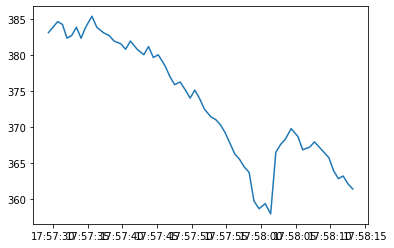

In [7]:
import matplotlib.pyplot as plt

history, change = stonks.get_price_history("ZM", 60)

prices = [doc.to_dict()["price"] for doc in history]
dates = [doc.to_dict()["timestamp"] for doc in history]

plt.plot(dates, prices)